___

total mess here

In [4]:
# from moviepy.editor import VideoFileClip

# input_file = "./data/videos-wemb/5 MIN WARM UP FOR AT HOME WORKOUTS (No Jumping).webm"
# output_file = "./data/videos-mp4/workout-1.mp4"

# clip = VideoFileClip(input_file)
# clip.write_videofile(output_file, codec="libx264", fps=clip.fps)

# clip.close()

In [5]:
# get sequence of joints from video

In [7]:
# import cv2
# import numpy as np
# import tensorflow as tf
# from scipy.spatial.distance import cdist
# from dtw import dtw


# # load the coach video and get the joint positions
# coach_video = cv2.VideoCapture('./data/videos-mp4/workout-1.mp4')
# coach_positions = []
# counter = 0

# while True:
#     ret, frame = coach_video.read()
#     if not ret:
#         break
    
#     counter += 1
    
#     if counter % 500 == 0:
#         print(counter)
    
#     # resize the frame and preprocess it for the MobileNet model
#     frame = cv2.resize(frame, (224, 224))
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)

#     outputs = get_positions_array(frame)
#     coach_positions.append(outputs)


In [8]:
# person_video = cv2.VideoCapture('./data/IMG_9251.MOV')
# person_positions = []

# while True:
#     ret, frame = person_video.read()
#     if not ret:
#         break
    
#     frame = cv2.resize(frame, (224, 224))
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)

#     # pass the frame through the MobileNet model and get the joint positions
#     outputs = get_positions_array(frame)
#     person_positions.append(outputs)
    

In [9]:
# coach_positions_flatten = [np.array(x).flatten() for x in coach_positions]
# person_positions_flatten = [np.array(x).flatten() for x in person_positions]

In [10]:
# import numpy as np
# from scipy.spatial.distance import euclidean
# from dtw import dtw
# import cv2
# from fastdtw import fastdtw
# from tqdm import tqdm


# window_size = 10 # in seconds
# overlap = 0.5 
# fps = 30

# window_length = int(window_size * fps) # in frames
# overlap_length = int(window_length * overlap)
# coach_segments = []
# person_segments = []

# for i in range(0, len(coach_positions_flatten) - window_length + 1, overlap_length):
#     coach_segments.append(coach_positions_flatten[i:i+window_length])

# for i in range(0, len(person_positions_flatten) - window_length + 1, overlap_length):
#     person_segments.append(person_positions_flatten[i:i+window_length])

# distances = []

# for i, coach_segment in tqdm(enumerate(coach_segments)):
#     for j, person_segment in enumerate(person_segments):
#         # Compute the DTW distance between the two segments
#         try:
#             distance, path = fastdtw(coach_segment, person_segment, dist=euclidean)
#             distances.append((distance, i, j))
#         except:
#             continue

# # best_distance, best_coach_segment_index, best_person_segment_index = min(distances)

# # coach_segment = coach_segments[best_coach_segment_index]
# # person_segment = person_segments[best_person_segment_index]

# # for i, joint_positions in enumerate(person_segment):
# #     deviation = compute_deviation(joint_positions, coach_segment[i])
# #     if deviation > threshold:
# #         highlight_area(i)


In [11]:
# [d for d in distances if d[0] > 0]

In [12]:
# import numpy as np
# from scipy.spatial.distance import cdist
# from fastdtw import fastdtw

# coach_joints = np.load('coach_joints.npy')
# person_joints = np.load('person_joints.npy')

# window_size = 10 * 30  
# overlap = 0.5  # 50% overlap

# n_windows = int(np.ceil((len(person_joints) - window_size) / (window_size * (1 - overlap))) + 1)

# distances = np.zeros(n_windows)

# for i in range(n_windows):
#     start_index = int(i * window_size * (1 - overlap))
#     end_index = min(start_index + window_size, len(person_joints))
    
#     person_window = person_joints[start_index:end_index]
#     coach_window = coach_joints[start_index:end_index]
    
#     distance, _ = fastdtw(person_window, coach_window, dist=cdist)
#     distances[i] = distance

# best_window_index = np.argmin(distances)
# best_start_index = int(best_window_index * window_size * (1 - overlap))
# best_end_index = min(best_start_index + window_size, len(person_joints))

# for i in range(len(person_joints)):
#     if i < best_start_index or i >= best_end_index:
#         # This frame is outside the best window, so skip it
#         continue
        
#     person_frame = person_joints[i]
#     coach_frame = coach_joints[i]
#     distance = cdist([person_frame], [coach_frame])[0][0]
#     if distance > threshold:
#         # This frame is a mistake, so


In [10]:
# cap = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/Untitled.mov')
# count = 0

# detector = Detector()

# while cap.isOpened():
    
#     ret, frame = cap.read()
    
#     if ret:
#         # Only process even-numbered frames
#         if count % 3 == 0:
#             frame = detector.findPose(frame)
#             cv2.imshow('window-name', frame)

#         count += 1

#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     else:
#         break

# cap.release()
# cv2.destroyAllWindows()

In [7]:
# import cv2
# import numpy as np
# import tensorflow as tf
# from scipy.spatial.distance import cdist
# from dtw import dtw


# def get_video_joints_sequences(cap):
#     normed_positions_sequence = []
#     real_positions_sequence = []
#     counter = -1
#     while True:
#         ret, frame = cap.read()
#         counter += 1
#         if counter % 500 == 0:
#             print(counter)

#         if ret:
#             if counter % 3 == 0:
#                 positions = get_positions_array(frame)
#                 normed_positions = [(y, x) for (x, y) in positions]
#                 img_height = frame.shape[0]
#                 img_width = frame.shape[1]
#                 if img_height > img_width:
#                     x_pad = 192 - int(192 * img_width / img_height)
#                     y_pad = 0
#                 else:
#                     y_pad = 192 - int(192 * img_height / img_width)
#                     x_pad = 0

#                 frame = np.array(frame)
#                 real_positions = []
#                 for (y, x) in positions:
#                     x, y = x*192, y*192
#                     real_x = int(img_width*((x - (x_pad / 2)) / (192 - x_pad)))
#                     real_y = int(img_height*((y - (y_pad / 2)) / (192 - y_pad)))
#                     real_positions.append((x, y))
#                 normed_positions_sequence.append(normed_positions)
#                 real_positions_sequence.append(real_positions)    
#         else:
#             break
    
#     return normed_positions_sequence, real_positions_sequence

In [81]:
# my_video = cv2.VideoCapture('./data/IMG_9251.MOV')

# person_normed, person_real = get_video_joints_sequences(my_video)

___

**IMPORTS**

In [3]:
import cv2
import numpy as np
import tensorflow as tf
from scipy.spatial.distance import cdist
from dtw import dtw
import tensorflow as tf
from enum import Enum
import numpy as np
from scipy.spatial import distance
from PIL import Image
import matplotlib.pyplot as plt
from fastdtw import fastdtw

2023-03-30 19:08:09.871693: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


___

**DETECTOR**

In [17]:
class Detector:
    def __init__(self):
        self.interpreter = tf.lite.Interpreter(model_path="../../ios/PoseEstimation/ML/Models/movenet_thunder.tflite")
        self.interpreter.allocate_tensors()
        
        
    def get_keypoints(self, img):
        image = np.array(img)[:, :, 0:3].astype('uint8')
        image = tf.expand_dims(image, axis=0)
        image = tf.image.resize_with_pad(image, 256, 256)
        input_image = tf.cast(image, dtype=tf.uint8)
        input_details = self.interpreter.get_input_details()
        output_details = self.interpreter.get_output_details()
        self.interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
        self.interpreter.invoke()
        keypoints_with_scores = self.interpreter.get_tensor(output_details[0]['index'])
        return keypoints_with_scores

    def decode_positions(self, keypoints):
        result = {}
        for i, vals in enumerate(keypoints[0][0]):
            result[JOINTS_DICT[i]] = vals
        return result

    def get_positions(self, frame):
        keypoints = self.get_keypoints(frame)
        positions = decode_positions(keypoints)
        return positions

    def get_positions_array(self, frame):
        keypoints = self.get_keypoints(frame)
        res = np.array([[x[0], x[1]] for x in keypoints[0][0]])
        return res   
    
    
    def drawWithVectors(self, frame, deviated=[]):
        positions = self.get_positions_array(frame)
        img_height = frame.shape[0]
        img_width = frame.shape[1]

        if img_height > img_width:
            x_pad = 192 - int(192 * img_width / img_height)
            y_pad = 0
        else:
            y_pad = 192 - int(192 * img_height / img_width)
            x_pad = 0

        frame = np.array(frame)
        real_positions = []

        for (y, x) in positions:
            x, y = x*192, y*192
            x = int(img_width*((x - (x_pad / 2)) / (192 - x_pad)))
            y = int(img_height*((y - (y_pad / 2)) / (192 - y_pad)))
            real_positions.append([x, y])
            
        
        for (x, y) in real_positions[5:]:
            cv2.circle(frame, (x, y), 5, (164, 147, 147), thickness=-1)
        
        for (i, (frm, to)) in enumerate(VECTORS):
            
            if i in deviated:
                color = (234, 9, 9)
            else:
                color = (164, 147, 147)
            
            cv2.line(frame, real_positions[frm.value], real_positions[to.value], thickness=3, color=color)
       
        return frame
        
    
    
    def findPose(self, frame, draw=True, deviated = [], thick=5):
        positions = self.get_positions_array(frame)        
        img_height = frame.shape[0]
        img_width = frame.shape[1]

        if img_height > img_width:
            x_pad = 192 - int(192 * img_width / img_height)
            y_pad = 0
        else:
            y_pad = 192 - int(192 * img_height / img_width)
            x_pad = 0

        frame = np.array(frame)

        for (i, (y, x)) in enumerate(positions):
            
            if i in deviated:
                color = (242, 75, 26)
            else:
                color = (0, 255, 0)
            
            x, y = x*192, y*192
            cv2.circle(frame, (int(img_width*((x - (x_pad / 2)) / (192 - x_pad))),
                               int(img_height*((y - (y_pad / 2)) / (192 - y_pad)))), 5, color, thickness=thick)
       
        
        return frame
    
    

In [18]:
detector = Detector()

___

**BODY COMPARISON METRIC**

In [19]:
class Joint(Enum):
    nose = 0
    left_eye = 1
    right_eye = 2
    left_ear = 3
    right_ear = 4
    left_shoulder = 5
    right_shoulder = 6
    left_elbow = 7
    right_elbow = 8
    left_wrist = 9
    right_wrist = 10
    left_hip = 11
    right_hip = 12
    left_knee = 13
    right_knee = 14
    left_ankle = 15
    right_ankle = 16
    
    
ANGLES = [
    [Joint.left_wrist, Joint.left_elbow, Joint.left_shoulder],
    [Joint.right_wrist, Joint.right_elbow, Joint.right_shoulder],
    
    [Joint.left_elbow, Joint.left_shoulder, Joint.left_hip],
    [Joint.right_elbow, Joint.right_shoulder, Joint.right_hip],
    
    
    [Joint.left_shoulder, Joint.left_hip, Joint.left_knee],
    [Joint.right_shoulder, Joint.right_hip, Joint.right_knee],
    
    [Joint.left_hip, Joint.left_knee, Joint.left_ankle],
    [Joint.right_hip, Joint.right_knee, Joint.right_ankle],
    
    
    [Joint.left_shoulder, Joint.right_shoulder, Joint.right_hip],
    [Joint.right_shoulder, Joint.left_shoulder, Joint.left_hip],
    
    [Joint.left_hip, Joint.right_hip, Joint.right_shoulder],
    [Joint.right_hip, Joint.left_hip, Joint.left_shoulder]
]


VECTORS = [
    [Joint.left_shoulder, Joint.left_elbow], # left shoulder -> left elbow
    [Joint.right_shoulder, Joint.right_elbow], # right shoulder -> right elbow
    
    [Joint.left_elbow, Joint.left_wrist], # left elbow -> left wrist
    [Joint.right_elbow, Joint.right_wrist], # right elbow -> right wrist
    
    [Joint.left_shoulder, Joint.left_hip], # left shoulder -> left hip
    [Joint.right_shoulder, Joint.right_hip], # right shoulder -> right hip
    
    [Joint.left_hip, Joint.left_knee], # left hip -> left knee
    [Joint.right_hip, Joint.right_knee], # right hip -> right knee
    
    [Joint.left_knee, Joint.left_ankle], # left knee -> left ankle
    [Joint.right_knee, Joint.right_ankle], # right knee -> right ankle,
    
    [Joint.left_shoulder, Joint.right_shoulder], # left shoulder -> right shoulder
    [Joint.left_hip, Joint.right_hip], # left hip -> right hip,
]

In [20]:
from scipy import spatial

def angle_between_vectors(vec1, vec2):
    cos_theta = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    normalized_angle = angle / np.pi
    return normalized_angle

def line_to_vector(line):
    return np.array([line[1][0] - line[0][0], line[1][1] - line[0][1]])

def compare_bodies(keypoints1, keypoints2):
    dist = 0
    for vec in VECTORS:
        vector1 = line_to_vector([keypoints1[vec[0].value], keypoints1[vec[1].value]])
        vector2 = line_to_vector([keypoints2[vec[0].value], keypoints2[vec[1].value]])
        dist += spatial.distance.cosine(vector1, vector2) ** 2
#         dist += np.abs(angle_between_vectors(vector1, vector2))
    return dist / len(VECTORS)
#     return dist

In [21]:
def get_deviated_keypoints(keypoints1, keypoints2):
    points = []
    for vec in VECTORS:
        vector1 = line_to_vector([keypoints1[vec[0].value], keypoints1[vec[1].value]])
        vector2 = line_to_vector([keypoints2[vec[0].value], keypoints2[vec[1].value]])
        dist = spatial.distance.cosine(vector1, vector2) ** 2
        if dist > 0.01:
            points.append(vec[0].value)
            points.append(vec[1].value)
    return list(set(points))
    

In [22]:
def get_deviated_vectors(keypoints1, keypoints2, t=0.01):
    vecs = []
    for i, vec in enumerate(VECTORS):
        vector1 = line_to_vector([keypoints1[vec[0].value], keypoints1[vec[1].value]])
        vector2 = line_to_vector([keypoints2[vec[0].value], keypoints2[vec[1].value]])
        dist = spatial.distance.cosine(vector1, vector2) ** 2
        if dist > t:
            vecs.append(i)
    return vecs
    

Some tests

In [9]:
im1 = Image.open('./data/Screenshot 2023-03-21 at 19.16.44.png')
im2 = Image.open('./data/Screenshot 2023-03-21 at 19.16.29.png')

detector = Detector()

f, axarr = plt.subplots(1, 2)
axarr[1].imshow(detector.drawWithVectors(np.array(im1)))
axarr[0].imshow(detector.drawWithVectors(np.array(im2)))

similarity_score = compare_bodies(detector.get_positions_array(im1), detector.get_positions_array(im2))

print("DISTANCE SCORE:")
print(similarity_score)

FileNotFoundError: [Errno 2] No such file or directory: './data/Screenshot 2023-03-21 at 19.16.44.png'

DISTANCE SCORE:
0.03877169945161688


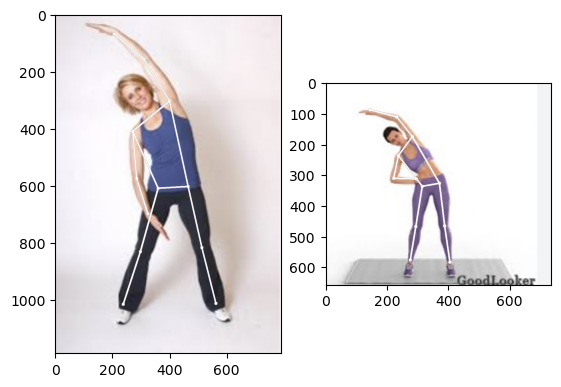

In [13]:
im1 = Image.open('./data/Screenshot 2023-03-21 at 19.16.44.png')
im2 = Image.open('./data/Screenshot 2023-03-21 at 20.08.20.png')

detector = Detector()

f, axarr = plt.subplots(1, 2)
axarr[1].imshow(detector.drawWithVectors(np.array(im1)))
axarr[0].imshow(detector.drawWithVectors(np.array(im2)))

similarity_score = compare_bodies(detector.get_positions_array(im1), detector.get_positions_array(im2))

print("DISTANCE SCORE:")
print(similarity_score)

DISTANCE SCORE:
0.428883942916948


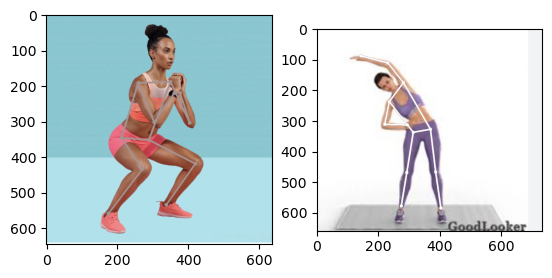

In [14]:
im1 = Image.open('./data/Screenshot 2023-03-21 at 19.16.44.png')
im2 = Image.open('./data/squat.jpeg')

detector = Detector()

f, axarr = plt.subplots(1, 2)
axarr[1].imshow(detector.drawWithVectors(np.array(im1)))
axarr[0].imshow(detector.drawWithVectors(np.array(im2)))

similarity_score = compare_bodies(detector.get_positions_array(im1), detector.get_positions_array(im2))

print("DISTANCE SCORE:")
print(similarity_score)

____

----

**EXTRACTING KEYPOINTS SEQUENCES FROM VIDEO**

In [23]:
def get_video_joints_sequences(cap, detector, rate=2):
    normed_positions_sequence = []
    counter = -1
    frame_counts = []
    while True:
        ret, frame = cap.read()
        counter += 1
        if ret:
            if counter % rate == 0:
                positions = detector.get_positions_array(frame)
                normed_positions = [(y, x) for (x, y) in positions]
                normed_positions_sequence.append(normed_positions)  
                frame_counts.append(counter)
        else:
            break
    return normed_positions_sequence, frame_counts

In [24]:
detector = Detector()

coach_vid = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/coach_1_ex.mp4')
coach_sequences, coach_frame_counts = get_video_joints_sequences(coach_vid, detector, rate=2)

len(coach_sequences)

2023-03-30 19:10:14.738642: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


311

In [25]:
person_vid1 = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/person-ex-1.mov')
person_sequences1, person_frame_counts1 = get_video_joints_sequences(person_vid1, detector, rate=2)

len(person_sequences1)

587

In [26]:
person_vid3 = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/person-ex-3.mov')
person_sequences3, person_frame_counts3 = get_video_joints_sequences(person_vid3, detector, rate=2)

len(person_sequences3)

298

In [27]:
person_vid2 = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/person-ex-2.mov')
person_sequences2, person_frame_counts2 = get_video_joints_sequences(person_vid2, detector, rate=2)

len(person_sequences2)

222

____

____

**ALIGNINH VIDEOS WITH DTW**

In [12]:
# def make_dtw_align(series1, series2):
    
#     n1, n2 = len(series1), len(series2)
#     best_distance = float('inf')
#     best_index = -1
    
#     for i in range(n1 - n2 + 1):
#         window = series1[i:i + n2]
#         distance, _ = fastdtw(window, series2, dist=lambda a, b: compare_bodies(a, b))
        
#         if distance < best_distance:
#             best_distance = distance
#             best_index = i
    
#     aligned_index = best_index + n2 - 1
#     return aligned_index, series1[aligned_index], best_distance

# # def make_dtw_align(series1, series2):
    

# #     distance, _ = fastdtw(series1, series2, dist=lambda a, b: compare_bodies(a, b))
# #     return 0, [], distance

In [14]:
WINDOW = 10
COACH_BUFFER_LENGTH = 20

coach_buffer = []
coach_buffer_frames = []
coach_frames_counter = 0


current_person_window = []
person_window_frames = []
person_frames_counter = 0


coach_buffer = coach_sequences[:COACH_BUFFER_LENGTH] # to start
coach_frames_counter = COACH_BUFFER_LENGTH
coach_buffer_frames = coach_frame_counts[:COACH_BUFFER_LENGTH]

person_sequences = person_sequences1
person_frame_counts = person_frame_counts1



window_counter = 0


for frame_index, keypoints in enumerate(person_sequences[:60]):
    
    if window_counter < WINDOW:
        current_person_window.append(person_sequences[person_frames_counter])
        person_window_frames.append(frame_index)
        person_frames_counter += 1
        window_counter += 1
        continue
           
    coach_buffer.append(coach_sequences[coach_frames_counter])
    coach_frames_counter += 1
    coach_buffer_frames.append(frame_index)
    
    
    current_person_window.append(person_sequences[person_frames_counter])
    person_window_frames.append(frame_index)
    person_frames_counter += 1

    
    coach_buffer = coach_buffer[1:]
    current_person_window = current_person_window[1:]
    
    coach_buffer_frames = coach_buffer_frames[1:]
    person_window_frames = person_window_frames[1:]
    
    
    aligned_index, aligned_point, distance = make_dtw_align(coach_buffer, current_person_window)
    print(f"distance {distance}")
    print(f"FRAME IN USER VIDEO: {person_frame_counts[frame_index]}")
    print(f"FRAME IN COACH VIDEO FOR IT: {coach_buffer_frames[aligned_index]}")
    print('\n\n')


distance 0.1471739613687279
FRAME IN USER VIDEO: 20
FRAME IN COACH VIDEO FOR IT: 10



distance 0.025654469376731822
FRAME IN USER VIDEO: 22
FRAME IN COACH VIDEO FOR IT: 11



distance 0.030826207400169406
FRAME IN USER VIDEO: 24
FRAME IN COACH VIDEO FOR IT: 12



distance 0.06450855225322381
FRAME IN USER VIDEO: 26
FRAME IN COACH VIDEO FOR IT: 13



distance 0.143351018295346
FRAME IN USER VIDEO: 28
FRAME IN COACH VIDEO FOR IT: 14



distance 0.12055863783510513
FRAME IN USER VIDEO: 30
FRAME IN COACH VIDEO FOR IT: 15



distance 0.1744781187086234
FRAME IN USER VIDEO: 32
FRAME IN COACH VIDEO FOR IT: 16



distance 0.23732668420018593
FRAME IN USER VIDEO: 34
FRAME IN COACH VIDEO FOR IT: 16



distance 0.155904965442643
FRAME IN USER VIDEO: 36
FRAME IN COACH VIDEO FOR IT: 17



distance 0.1326727306365465
FRAME IN USER VIDEO: 38
FRAME IN COACH VIDEO FOR IT: 19



distance 0.06334985795238748
FRAME IN USER VIDEO: 40
FRAME IN COACH VIDEO FOR IT: 20



distance 0.02995833535416414
FRAME IN

In [20]:
import time

# detector_1 = Detector()
# detector_2 = Detector()

WINDOW = 10
COACH_BUFFER_LENGTH = 20

coach_buffer = []
coach_buffer_frames = []
coach_frames_counter = 0

current_person_window = []
person_window_frames = []
person_frames_counter = 0

window_counter = 0


coach_buffer = coach_sequences[:COACH_BUFFER_LENGTH] # to start
coach_frames_counter = COACH_BUFFER_LENGTH
coach_buffer_frames = coach_frame_counts[:COACH_BUFFER_LENGTH]

person_sequences = person_sequences2
person_frame_counts = person_frame_counts2



benchmark_cam = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/coach_1_ex.mp4')
user_cam = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/person-ex-2.mov')


fps_time = 0 #Initializing fps to 0

frame_counter = -1
correct_frames = 0


while (benchmark_cam.isOpened() or user_cam.isOpened()):

#     try:
        ret_val, image_1 = user_cam.read()
        ret_val_1,image_2 = benchmark_cam.read()
        
        
        frame_counter = frame_counter + 1
        
        if ret_val and ret_val_1:
            if frame_counter % 2 == 0:


                if frame_counter >= user_cam.get(cv2.CAP_PROP_FRAME_COUNT):
                    break
                

                winname = "User Video"
                cv2.namedWindow(winname)   # Create a named window
                cv2.moveWindow(winname, 720, -100)  # Move it to desired location
#
    
                if frame_counter >= benchmark_cam.get(cv2.CAP_PROP_FRAME_COUNT):
                    break
                
                
#                 image_2 = detector_2.findPose(image_2)
#                 image_2 
                if ret_val_1 or ret_val:
                    
                    if window_counter < WINDOW:
                        current_person_window.append(person_sequences[person_frames_counter])
                        person_window_frames.append(frame_counter)
                        person_frames_counter += 1
                        window_counter += 1
                        continue

                    coach_buffer.append(coach_sequences[coach_frames_counter])
                    coach_frames_counter += 1
                    coach_buffer_frames.append(frame_counter)


                    current_person_window.append(person_sequences[person_frames_counter])
                    person_window_frames.append(frame_counter)
                    person_frames_counter += 1


                    coach_buffer = coach_buffer[1:]
                    current_person_window = current_person_window[1:]

                    coach_buffer_frames = coach_buffer_frames[1:]
                    person_window_frames = person_window_frames[1:]


                    aligned_index, aligned_point, distance = make_dtw_align(coach_buffer, current_person_window)
                    print(f"distance {distance}")
                    print(f"FRAME IN USER VIDEO: {person_frame_counts[frame_counter]}")
                    print(f"FRAME IN COACH VIDEO FOR IT: {coach_buffer_frames[aligned_index]}")
                    print('\n\n')

                    error = distance

                    # Displaying the error percentage
                    cv2.putText(image_1, 'Error: {}%'.format(str(round(100*(float(error)),2))), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                    # If the similarity is > 90%, take it as correct step. Otherwise incorrect step.
                    if error < 1.2:
                        cv2.putText(image_1, "CORRECT STEPS", (40, 600),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                        correct_frames += 1
                    else:
                        cv2.putText(image_1,  "INCORRECT STEPS", (40, 600), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    cv2.putText(image_1, "FPS: %f" % (1.0 / (time.time() - fps_time)), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    # Display the dynamic accuracy of dance as the percentage of frames that appear as correct
#                     if frame_counter==0:
#                         frame_counter = user_cam.get(cv2.CAP_PROP_FRAME_COUNT)
                        
                    cv2.putText(image_1, "Dance Steps Accurately Done: {}%".format(str(round(100*correct_frames/frame_counter, 2))), (10, 70), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

                    # Display both the benchmark and the user videos
                    cv2.imshow('Benchmark Video', image_2)
                    cv2.imshow('User Video', image_1)

                    fps_time = time.time()
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break
            
        else:
            print("aaaa")
            break
#     except:
#         pass

#     benchmark_cam.release()
#     user_cam.release()
#     cv2.destroyAllWindows()

distance 1.0521243479971163
FRAME IN USER VIDEO: 40
FRAME IN COACH VIDEO FOR IT: 36



distance 1.3206564943286316
FRAME IN USER VIDEO: 44
FRAME IN COACH VIDEO FOR IT: 36



distance 1.67865339026054
FRAME IN USER VIDEO: 48
FRAME IN COACH VIDEO FOR IT: 36



distance 2.2224466973848696
FRAME IN USER VIDEO: 52
FRAME IN COACH VIDEO FOR IT: 38



distance 2.8778850294735823
FRAME IN USER VIDEO: 56
FRAME IN COACH VIDEO FOR IT: 38



distance 3.6850576574954967
FRAME IN USER VIDEO: 60
FRAME IN COACH VIDEO FOR IT: 20



distance 4.956369946088014
FRAME IN USER VIDEO: 64
FRAME IN COACH VIDEO FOR IT: 20



distance 5.910972110296381
FRAME IN USER VIDEO: 68
FRAME IN COACH VIDEO FOR IT: 22



distance 6.523825671210586
FRAME IN USER VIDEO: 72
FRAME IN COACH VIDEO FOR IT: 32



distance 6.008780855709152
FRAME IN USER VIDEO: 76
FRAME IN COACH VIDEO FOR IT: 38



distance 5.453840975343469
FRAME IN USER VIDEO: 80
FRAME IN COACH VIDEO FOR IT: 40



distance 4.9735212918031335
FRAME IN USER VIDEO: 8

distance 4.676114356564252
FRAME IN USER VIDEO: 416
FRAME IN COACH VIDEO FOR IT: 200



distance 4.942013055696064
FRAME IN USER VIDEO: 420
FRAME IN COACH VIDEO FOR IT: 198



distance 4.626835563763917
FRAME IN USER VIDEO: 424
FRAME IN COACH VIDEO FOR IT: 200



distance 4.241082125303667
FRAME IN USER VIDEO: 428
FRAME IN COACH VIDEO FOR IT: 200



distance 3.972297028024734
FRAME IN USER VIDEO: 432
FRAME IN COACH VIDEO FOR IT: 202



distance 3.4446775262818874
FRAME IN USER VIDEO: 436
FRAME IN COACH VIDEO FOR IT: 202



distance 3.4786823359943884
FRAME IN USER VIDEO: 440
FRAME IN COACH VIDEO FOR IT: 202



distance 3.0829222907366187


IndexError: list index out of range

In [ ]:
            
#                     if window_counter < WINDOW:
#                         current_person_window.append(person_sequences[person_frames_counter])
#                         person_window_frames.append(frame_index)
#                         person_frames_counter += 1
#                         window_counter += 1
#                         continue

#                     coach_buffer.append(coach_sequences[coach_frames_counter])
#                     coach_frames_counter += 1
#                     coach_buffer_frames.append(frame_index)


#                     current_person_window.append(person_sequences[person_frames_counter])
#                     person_window_frames.append(frame_index)
#                     person_frames_counter += 1


#                     coach_buffer = coach_buffer[1:]
#                     current_person_window = current_person_window[1:]

#                     coach_buffer_frames = coach_buffer_frames[1:]
#                     person_window_frames = person_window_frames[1:]


#                     aligned_index, aligned_point, distance = make_dtw_align(coach_buffer, current_person_window)
#                     print(f"distance {distance}")
#                     print(f"FRAME IN USER VIDEO: {person_frame_counts[frame_index]}")
#                     print(f"FRAME IN COACH VIDEO FOR IT: {coach_buffer_frames[aligned_index]}")
#                     print('\n\n')


_____

____

In [336]:
# from tqdm import tqdm


# def v_compare(person_sequences, COMPARING_NUMBER = 40, WAITING_WINDOW_LEN = 30, COACH_WINDOW_LEN = 20):

#     COMPARING_NUMBER = COMPARING_NUMBER

#     WAITING_WINDOW_LEN = WAITING_WINDOW_LEN
#     COACH_WINDOW_LEN = COACH_WINDOW_LEN

#     FRAME_COUNTER = 0

#     person_slice = []
#     coach_slice = []

#     person_slice_indexes = []
#     coach_slice_indexes = []

#     distance = None

#     person_counter = 0
#     coach_counter = 0

#     matched_person = []
#     matched_coach = []

#     distances = []



#     for frame_index, keypoints in tqdm(enumerate(person_sequences[:500])):
        
#         try:

#             if FRAME_COUNTER < COACH_WINDOW_LEN:
#                 person_slice.append(person_sequences[person_counter])
#                 coach_slice.append(coach_sequences[coach_counter])

#                 person_slice_indexes.append(person_counter)
#                 coach_slice_indexes.append(coach_counter)

#                 person_counter += 1
#                 coach_counter += 1
#                 FRAME_COUNTER += 1



#                 continue

#         #     print(f'LENGTHS: user - {len(person_slice_indexes)}, coach - {len(coach_slice_indexes)}')

#             if len(person_slice) < WAITING_WINDOW_LEN:
#                 person_slice.append(person_sequences[person_counter])
#                 person_slice_indexes.append(person_counter)
#                 person_counter += 1
#                 distances.append(distance)
#                 continue


#             _, alligned = fastdtw(person_slice, coach_slice, dist=lambda a, b: compare_bodies(a, b))

#             position_match = max([x[0] for x in alligned if x[1] == 0])

#         #     print(f'POSTION MATCH: {position_match}')

#             matched_coach.append(coach_slice_indexes[0])
#             matched_person.append(person_slice_indexes[position_match])

#             distance, _ = fastdtw(person_slice[-COMPARING_NUMBER:], coach_slice[-COMPARING_NUMBER:], dist=lambda a, b: compare_bodies(a, b))
#             distances.append(distance)

#             coach_slice = coach_slice[1:]
#             coach_slice.append(coach_sequences[coach_counter])
#             coach_slice_indexes = coach_slice_indexes[1:]
#             coach_slice_indexes.append(coach_counter)
#             coach_counter += 1


#             person_slice = person_slice[position_match+1:]
#             person_slice.append(person_sequences[person_counter])
#             person_slice_indexes = person_slice_indexes[position_match+1:]
#             person_slice_indexes.append(person_counter)
#             person_counter += 1
            
#         except:
#              return [x for x in distances if x != None], _, _
    
#     return [x for x in distances if x != None], matched_coach, matched_person


        
    
    
    
    
    
    
    
    

469it [01:32,  5.08it/s]
222it [00:38,  5.84it/s]
298it [00:52,  5.65it/s]


0:03:03.119184


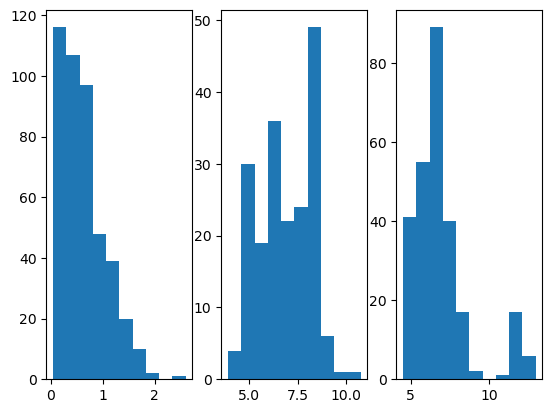

In [326]:
import datetime

start = datetime.datetime.now()


distances1 = v_compare(person_sequences1,
                       COMPARING_NUMBER=40,
                       WAITING_WINDOW_LEN=30,
                       COACH_WINDOW_LEN=20,
                )

distances2 = v_compare(person_sequences2,
                       COMPARING_NUMBER=40,
                       WAITING_WINDOW_LEN=30,
                       COACH_WINDOW_LEN=20,
                )

distances3 = v_compare(person_sequences3,
                       COMPARING_NUMBER=40,
                       WAITING_WINDOW_LEN=30,
                       COACH_WINDOW_LEN=20,
                )

end = datetime.datetime.now()
print(end-start)

f, axarr = plt.subplots(1, 3)
axarr[0].hist(pd.Series(distances1));
axarr[1].hist(pd.Series(distances2));
axarr[2].hist(pd.Series(distances3));

In [47]:
from tqdm import tqdm

person_sequences = person_sequences1

COMPARING_NUMBER = 25

WAITING_WINDOW_LEN = 20
COACH_WINDOW_LEN = 20

FRAME_COUNTER = 0

person_slice = []
coach_slice = []

person_slice_indexes = []
coach_slice_indexes = []

distance = None

person_counter = 0
coach_counter = 0

matched_person_indexes = []
matched_coach_indexes = []

matched_person = []
matched_coach = []



distances = []



for frame_index, keypoints in tqdm(enumerate(person_sequences[:500])):

    try:

        if FRAME_COUNTER < COACH_WINDOW_LEN:
            person_slice.append(person_sequences[person_counter])
            coach_slice.append(coach_sequences[coach_counter])

            person_slice_indexes.append(person_counter)
            coach_slice_indexes.append(coach_counter)

            person_counter += 1
            coach_counter += 1
            FRAME_COUNTER += 1



            continue

    #     print(f'LENGTHS: user - {len(person_slice_indexes)}, coach - {len(coach_slice_indexes)}')

        if len(person_slice) < WAITING_WINDOW_LEN:
            person_slice.append(person_sequences[person_counter])
            person_slice_indexes.append(person_counter)
            person_counter += 1
            distances.append(distance)
            continue


        _, alligned = fastdtw(person_slice, coach_slice, dist=lambda a, b: compare_bodies(a, b))

        position_match = max([x[0] for x in alligned if x[1] == 0])
#         print((coach_slice_indexes[0], person_slice_indexes[position_match]))

    #     print(f'POSTION MATCH: {position_match}')

        matched_coach_indexes.append(coach_slice_indexes[0])
        matched_person_indexes.append(person_slice_indexes[position_match])
        
        matched_coach.append(coach_slice[0])
        matched_person.append(person_slice[position_match])
        
        

        distance, _ = fastdtw(matched_coach[-COMPARING_NUMBER:], matched_person[-COMPARING_NUMBER:], dist=lambda a, b: compare_bodies(a, b))
        distances.append(distance)

        coach_slice = coach_slice[1:]
        coach_slice.append(coach_sequences[coach_counter])
        coach_slice_indexes = coach_slice_indexes[1:]
        coach_slice_indexes.append(coach_counter)
        coach_counter += 1


        person_slice = person_slice[position_match+1:]
        person_slice.append(person_sequences[person_counter])
        person_slice_indexes = person_slice_indexes[position_match+1:]
        person_slice_indexes.append(person_counter)
        person_counter += 1

    except:
         break

459it [01:24,  5.42it/s]


(614, 404)
0.45901013168880067


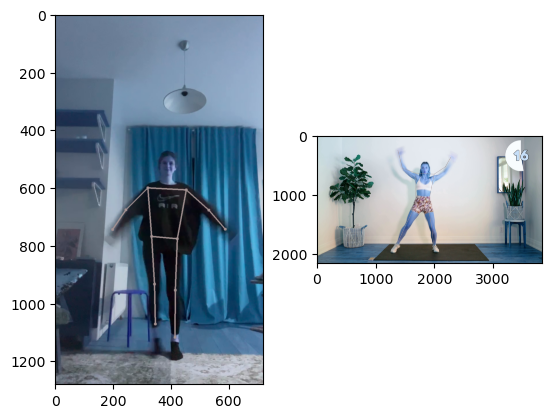

In [46]:
i = 202

person_vid = person_vid1
(COACH, USER) = (matched_coach_indexes[i]*2, matched_person_indexes[i]*2)
print(((USER, COACH)))

coach_vid.set(1, COACH);
ret, frame1 = coach_vid.read()

person_vid.set(1, USER);
ret, frame2 = person_vid.read()

f, axarr = plt.subplots(1, 2)
axarr[1].imshow(np.array(detector.drawWithVectors(frame1)))
axarr[0].imshow(detector.drawWithVectors(frame2))

print(compare_bodies(detector.get_positions_array(frame1), detector.get_positions_array(frame2)))

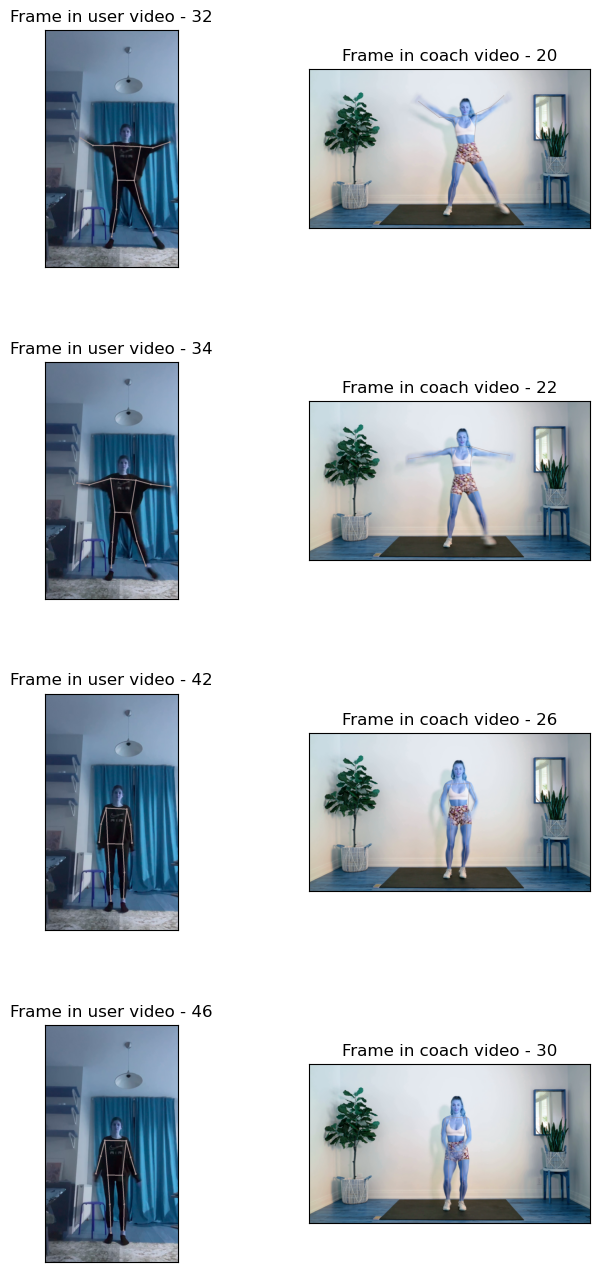

In [30]:
person_vid = person_vid1
inds = random_frame_indexes = [10, 11, 13, 15]

num_rows = len(inds)
num_cols = 2

element_width = 4
element_height = 4

fig_width = num_cols * element_width
fig_height = num_rows * element_height

f, axarr = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

for (k, i) in enumerate(inds):
    
    (COACH, USER) = (matched_coach_indexes[i]*2, matched_person_indexes[i]*2)
    coach_vid.set(1, COACH);
    ret, frame1 = coach_vid.read()

    person_vid.set(1, USER);
    ret, frame2 = person_vid.read()


    axarr[k][1].imshow(np.array(detector.drawWithVectors(frame1)))
    axarr[k][0].imshow(detector.drawWithVectors(frame2))
    
    axarr[k, 1].set_xticks([])
    axarr[k, 1].set_yticks([])
    
    axarr[k, 0].set_xticks([])
    axarr[k, 0].set_yticks([])
    
    axarr[k, 1].set_title(f"Frame in coach video - {COACH}")
    axarr[k, 0].set_title(f"Frame in user video - {USER}")

f.subplots_adjust(hspace=0.4 , wspace=0.2)    
    
#     print(compare_bodies(detector.get_positions_array(frame1), detector.get_positions_array(frame2)))

In [623]:
import time

COMPARING_NUMBER = 25

WAITING_WINDOW_LEN = 20
COACH_WINDOW_LEN = 10

FRAME_COUNTER = 0

person_slice = []
coach_slice = []

person_slice_indexes = []
coach_slice_indexes = []

distance = None

person_counter = 0
coach_counter = 0

matched_person_indexes = []
matched_coach_indexes = []

matched_person = []
matched_coach = []
distances = []

last_deviated = []


detector1 = Detector()

person_sequences = person_sequences3
person_frame_counts = person_frame_counts3

k_color = (252, 255, 60)
result_ready = False

benchmark_cam = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/coach_1_ex.mp4')
user_cam = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/diploma-videos/person-ex-3.mov')


fps_time = 0 #Initializing fps to 0

frame_counter = -1
correct_frames = 0


while (benchmark_cam.isOpened() or user_cam.isOpened()):

#     try:
        ret_val, image_1 = user_cam.read()
        ret_val_1,image_2 = benchmark_cam.read()
        
        
        frame_counter = frame_counter + 1
        
        if ret_val and ret_val_1:
            if frame_counter % 2 == 0:


                if frame_counter >= user_cam.get(cv2.CAP_PROP_FRAME_COUNT):
                    break
                

                winname = "User Video"
                cv2.namedWindow(winname)   # Create a named window
                cv2.moveWindow(winname, 720, -100)  # Move it to desired location
                
    
                if frame_counter >= benchmark_cam.get(cv2.CAP_PROP_FRAME_COUNT):
                    break
                

                if ret_val_1 or ret_val:
        
        
#                     try:
        
        
    
                        if FRAME_COUNTER < COACH_WINDOW_LEN:
                            label = 'Keep going'
                            color = k_color
                            person_slice.append(person_sequences[person_counter])
                            coach_slice.append(coach_sequences[coach_counter])

                            person_slice_indexes.append(person_counter)
                            coach_slice_indexes.append(coach_counter)

                            person_counter += 1
                            coach_counter += 1
                            FRAME_COUNTER += 1

                        if len(person_slice) < WAITING_WINDOW_LEN:
                            result_ready = False
                            person_slice.append(person_sequences[person_counter])
                            person_slice_indexes.append(person_counter)
                            person_counter += 1
                            distances.append(distance)
                            label = 'Keep going'
                            color = k_color

                        else:
                            result_ready = True



                        _, alligned = fastdtw(person_slice, coach_slice, dist=lambda a, b: compare_bodies(a, b))
                        position_match = max([x[0] for x in alligned if x[1] == 0])

                        matched_coach_indexes.append(coach_slice_indexes[0])
                        matched_person_indexes.append(person_slice_indexes[position_match])

                        matched_coach.append(coach_slice[0])
                        matched_person.append(person_slice[position_match])


                        distance, _ = fastdtw(matched_coach[-COMPARING_NUMBER:], matched_person[-COMPARING_NUMBER:], dist=lambda a, b: compare_bodies(a, b))
                        distances.append(distance)

                        coach_slice = coach_slice[1:]
                        coach_slice.append(coach_sequences[coach_counter])
                        coach_slice_indexes = coach_slice_indexes[1:]
                        coach_slice_indexes.append(coach_counter)
                        coach_counter += 1


                        person_slice = person_slice[position_match+1:]
                        person_slice.append(person_sequences[person_counter])
                        person_slice_indexes = person_slice_indexes[position_match+1:]
                        person_slice_indexes.append(person_counter)
                        person_counter += 1

                        error = distance


                        # If the similarity is > 90%, take it as correct step. Otherwise incorrect step.
                        if error < 1.5 and result_ready:
                            label = 'Nice!'
                            color = (0, 255, 0)
                            last_deviated = []
                        elif error >= 1.5 and result_ready:
                            label  = 'Bad!'
                            color = (0, 0, 255)
                            deviated = get_deviated_vectors(matched_coach[-1], matched_person[-1])
                            last_deviated = deviated
                            
                        
                        image_1 = detector1.drawWithVectors(image_1, deviated=last_deviated)
                            
                            
                            
                            
                            

                        cv2.putText(image_1, label.upper(), (40, 600),cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
                        
                        
                        




                        # Display both the benchmark and the user videos
                        cv2.imshow('Benchmark Video', image_2)
                        cv2.imshow('User Video', image_1)

                        fps_time = time.time()
                        if cv2.waitKey(1) & 0xFF == ord('q'):
                            break
#                     except:
#                         break
            
        else:
            print("aaaa")
            break
#     except:
#         pass

#     benchmark_cam.release()
#     user_cam.release()
#     cv2.destroyAllWindows()

IndexError: list index out of range

0.08210840608709337


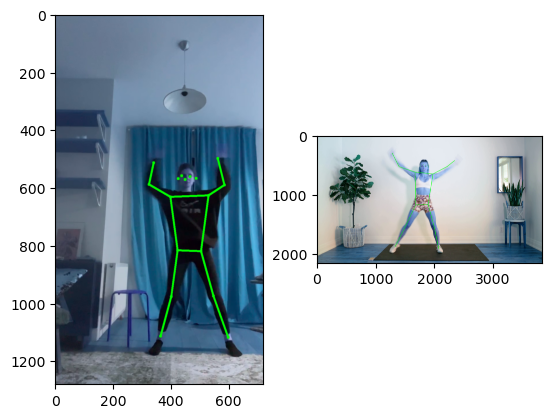

In [47]:
(COACH, USER) = (48, 28)

coach_vid.set(1, COACH);
ret, frame1 = coach_vid.read()

person_vid.set(1, USER); # Where frame_no is the frame you want
ret, frame2 = person_vid.read()

f, axarr = plt.subplots(1, 2)
axarr[1].imshow(np.array(detector.drawWithVectors(frame1)))
axarr[0].imshow(detector.drawWithVectors(frame2))

print(compare_bodies(detector.get_positions_array(frame1), detector.get_positions_array(frame2)))

In [2]:
# import numpy as np
# from scipy.spatial.distance import cdist
# from fastdtw import fastdtw

# def compare_keypoints(coach_keypoints, person_keypoints):
#     distance, _ = fastdtw(coach_keypoints, person_keypoints, dist=lambda a, b: np.linalg.norm(a - b))
#     return distance

In [4]:
# import cv2, time
# from scipy.spatial.distance import cosine
# from fastdtw import fastdtw
# import tensorflow as tf


# user_cam = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/Untitled 4.mov')
# benchmark_cam = cv2.VideoCapture('/Users/yelyzavetaboiarchuk/Desktop/Untitled 2.mp4')


# fps_time = 0 #Initializing fps to 0

# detector_1 = Detector()
# detector_2 = Detector()
# frame_counter = 0
# correct_frames = 0


# while (benchmark_cam.isOpened() or user_cam.isOpened()):

#     try:
#         ret_val, image_1 = user_cam.read()
#         ret_val_1,image_2 = benchmark_cam.read()
        
#         if ret_val and ret_val_1:
#             frame_counter += 1
#             if frame_counter % 5 == 0:


#                 if frame_counter >= user_cam.get(cv2.CAP_PROP_FRAME_COUNT):
#                     print("gpppdpd")
#                     frame_counter = 0 
#                     correct_frames = 0
#                     user_cam.set(cv2.CAP_PROP_POS_FRAMES, 0)

#                 winname = "User Video"
#                 cv2.namedWindow(winname)   # Create a named window
#                 cv2.moveWindow(winname, 720, -100)  # Move it to desired location
#                 image_1 = detector_1.findPose(image_1)
#                 lmList_user = detector_1.findPosition(image_1)

    
#                 if frame_counter >= benchmark_cam.get(cv2.CAP_PROP_FRAME_COUNT):
#                     break

    
#                 image_2 = detector_2.findPose(image_2)
#                 lmList_benchmark = detector_2.findPosition(image_2)



#                 if ret_val_1 or ret_val:
#                     error, _ = fastdtw(lmList_user, lmList_benchmark, dist=cosine)

#                     # Displaying the error percentage
#                     cv2.putText(image_1, 'Error: {}%'.format(str(round(100*(float(error)),2))), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

#                     # If the similarity is > 90%, take it as correct step. Otherwise incorrect step.
#                     if error < 0.07:
#                         cv2.putText(image_1, "CORRECT STEPS", (40, 600),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#                         correct_frames += 1
#                     else:
#                         cv2.putText(image_1,  "INCORRECT STEPS", (40, 600), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
#                     cv2.putText(image_1, "FPS: %f" % (1.0 / (time.time() - fps_time)), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#                     # Display the dynamic accuracy of dance as the percentage of frames that appear as correct
#                     if frame_counter==0:
#                         frame_counter = user_cam.get(cv2.CAP_PROP_FRAME_COUNT)
#                     cv2.putText(image_1, "Dance Steps Accurately Done: {}%".format(str(round(100*correct_frames/frame_counter, 2))), (10, 70), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

#                     # Display both the benchmark and the user videos
#                     cv2.imshow('Benchmark Video', image_2)
#                     cv2.imshow('User Video', image_1)

#                     fps_time = time.time()
#                     if cv2.waitKey(1) & 0xFF == ord('q'):
#                         break

#         else:
#             print("aaaa")
#             break
#     except:
#         pass

#     benchmark_cam.release()
#     user_cam.release()
#     cv2.destroyAllWindows()

2023-03-21 18:56:19.840606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


aaaa


In [258]:
alligned

[(0, 0),
 (1, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (5, 6),
 (6, 6),
 (7, 6),
 (8, 6),
 (9, 6),
 (10, 6),
 (11, 6),
 (12, 6),
 (13, 6),
 (14, 6),
 (15, 6),
 (16, 6),
 (17, 6),
 (18, 7),
 (19, 8),
 (19, 9),
 (20, 10),
 (21, 11),
 (21, 12),
 (22, 13),
 (23, 14),
 (24, 15),
 (25, 16),
 (25, 17),
 (26, 18),
 (26, 19),
 (26, 20),
 (27, 21),
 (28, 22),
 (29, 22),
 (30, 23),
 (31, 24),
 (31, 25),
 (32, 26),
 (32, 27),
 (33, 28),
 (33, 29),
 (33, 30),
 (33, 31),
 (34, 32),
 (35, 32),
 (36, 33),
 (36, 34),
 (37, 35),
 (37, 36),
 (38, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (43, 44),
 (44, 45),
 (45, 46),
 (45, 47),
 (46, 48),
 (46, 49),
 (46, 50),
 (46, 51),
 (47, 52),
 (48, 53),
 (49, 53),
 (50, 54),
 (50, 55),
 (51, 56),
 (52, 57),
 (53, 58),
 (54, 58),
 (55, 58),
 (56, 58),
 (57, 58),
 (58, 58),
 (59, 59)]